# Style transfer 

**Notebook with implementation of Style transfer with convolutional neural nets.**

**I made a bot page on Facebook that uses this model, and some people might be interested on how it's done so here it is.**

**The page: https://www.facebook.com/Random-Art-Bot-V2000-114435166877279/**

**The code is based on the tutorial on Tensorflow, with some modifications: https://www.tensorflow.org/tutorials/generative/style_transfer**

### Libraries:

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
tf.enable_eager_execution()

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

# Define function to load images

**Here's the catch, the tutorial on the link above is on the Tensorflow Hub model: https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1**

**But, they made a new model that the tutorial doesn't apply as much, with the same link ending with 2 instead of 1. And the documentation on the page doesn't help anything since the resizing is different and harder. So we have to work around that.**

**This is how their code looks like:**

In [2]:
def load_img(path_to_img):
    #Set max possible pixels in image
    max_dim = 512
    
    #Reads and converts
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    #Gets the image's sizes
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    
    #Rescales the image so the largest dimension is 512 pixels
    long_dim = max(shape)
    scale = max_dim / long_dim
    
    #Passes this new shape
    new_shape = tf.cast(shape * scale, tf.int32)
    
    #Resizes with new shape
    img = tf.image.resize(img, new_shape)
    
    #Add batch size/dimension
    img = img[tf.newaxis, :]
    return img

**The new model was trained on Style images reduced to 256 pixels, which isn't being done on the code above. The style image is best at this scale, but the Content image can be whatever size. So we will do as such.**

In [3]:
def load_image(path_to_img):
    
    #Tensorflow reads the image file
    img = tf.io.read_file(path_to_img)
    
    #Decodes the images according to it's format (JPG PNG etc.) and transforms it to a Tensor of uint8
    img = tf.image.decode_image(img, channels=3)
    
    #Transforms the uint8 Tensor into a float32 Tensor
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    #Add batch size/dimension
    img = img[tf.newaxis, :]
    
    #Given the Style image is in a directory called Styles, we can uniquely resize the Style images
    if 'Styles' in path_to_img:
        
        #Resizing, preserve_aspect_ratio doesn't stretch the image, preserving scale and form
        img = tf.image.resize(img, (256, 256), preserve_aspect_ratio=True)

    #Return image
    return img

**Create a simple function to display an image.**

In [4]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

**Load images we're using.**

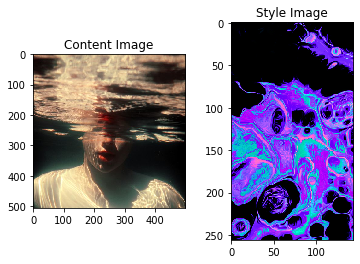

In [5]:
content_image = load_image('La Petite Ecole.jpg')
style_image = load_image('Styles//Faith.jpg')

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

**Funtion to transform Tensor back to Image matrix.**

In [6]:
def tensor_to_image(tensor):
    #Images have been regularized between 0 and 1 by dividing all the values by 255, so we reverse that
    tensor = tensor*255
    
    #Converting Float Tensor back to uint8
    tensor = np.array(tensor, dtype=np.uint8)
    
    #Checking if image has 3 dimensions or less 
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

**Model usage.**

Wall time: 1min 13s


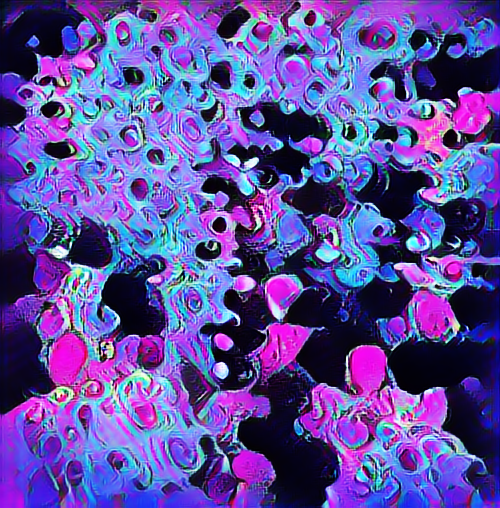

In [7]:
%%time

# Load model v2.0
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

#Passes the images to the model, selects the proper funtion in list [0]
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

#Result
tensor_to_image(stylized_image)

**Save image.**

In [8]:
tensor_to_image(stylized_image).save('Stylized_image.jpg')